In [ ]:
#Importing Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/19060/OneDrive/Desktop/DATA SCIENCE/MACHINE LEARNING/DATA SET/suv_data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
df.shape

(400, 5)

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,385.000000,365.000000,400.000000
mean,1.569154e+07,38.023377,70339.726027,0.357500
std,7.165832e+04,10.426178,33987.549190,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,30.000000,44000.000000,0.000000
50%,1.569434e+07,37.000000,71000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              385 non-null    float64
 3   EstimatedSalary  365 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [6]:
print("number of records "+str(len(df)))

number of records 400


# Analyzing Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

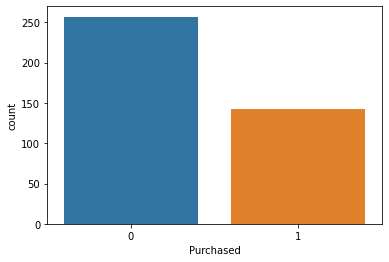

In [7]:
# count for purchased, not purchased
sns.countplot(x="Purchased",data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

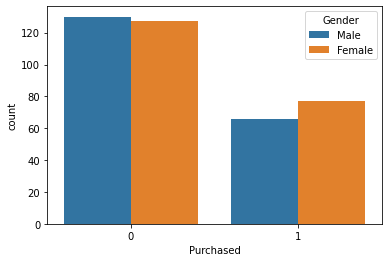

In [8]:
#Gender wise
sns.countplot(x="Purchased",hue="Gender",data=df)

<AxesSubplot:ylabel='Frequency'>

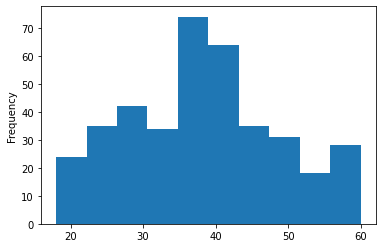

In [9]:
# Age wise
df["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

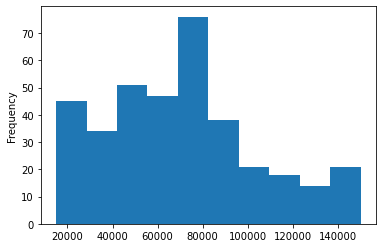

In [10]:
# Salary wise
df["EstimatedSalary"].plot.hist()

# Data Wrangling

In [11]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [12]:
df.isnull().sum()

User ID             0
Gender              0
Age                15
EstimatedSalary    35
Purchased           0
dtype: int64

<AxesSubplot:>

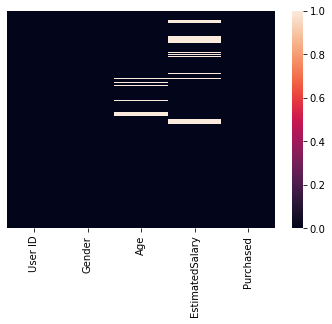

In [13]:
#lets check NULL with the help of sns
sns.heatmap(df.isnull(),yticklabels=False)

In [14]:
df.shape

(400, 5)

In [15]:
df.dropna(inplace=True)

In [16]:
#null values dropped
df.shape

(352, 5)

In [17]:
# No NULL Values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

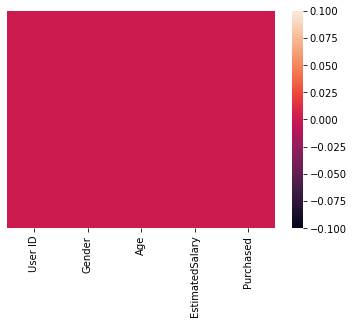

In [18]:
#lets check this with the help of sns
sns.heatmap(df.isnull(),yticklabels=False)

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [20]:
gender=pd.get_dummies(df["Gender"],drop_first=True)
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [21]:
df=pd.concat([df,gender],axis=1)

In [22]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19.0,19000.0,0,1
1,15810944,Male,35.0,20000.0,0,1
2,15668575,Female,26.0,43000.0,0,0
3,15603246,Female,27.0,57000.0,0,0
4,15804002,Male,19.0,76000.0,0,1


In [23]:
df.drop(["User ID","Gender"],inplace=True,axis=1)

In [24]:
df.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,0,0
3,27.0,57000.0,0,0
4,19.0,76000.0,0,1


In [25]:
# Data is cleaned now

# training and testing

In [28]:
#Declaring X and y

X=df.drop(["Purchased"],axis=1)
X.head()

,Age,EstimatedSalary,Male
0,19.0,19000.0,1
1,35.0,20000.0,1
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,1


In [30]:
y=df["Purchased"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
lgmodel=LogisticRegression(random_state=1)
lgmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [38]:
y_pred=lgmodel.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8636363636363636

In [ ]:
# Accuracy is good